### Problems

1. **Camera Calibration [8 pts]**. For the pair of images in the folder `calibraion`, calculate the camera projection matrices by using 2D matches in both views and 3D point
coordinates in `lab_3d.txt`. Once you have computed your projection matrices,
you can evaluate them using the provided evaluation function
(evaluate_points). The function outputs the projected 2-D points and
residual error. Report the estimated 3 × 4 camera projection matrices (for
each image), and residual error.
<b>Hint:</b> The residual error should be < 20 and the squared distance of the
projected 2D points from actual 2D points should be < 4.



In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def evaluate_points(M, points_2d, points_3d):
    """
    Visualize the actual 2D points and the projected 2D points calculated from
    the projection matrix
    You do not need to modify anything in this function, although you can if you
    want to
    :param M: projection matrix 3 x 4
    :param points_2d: 2D points N x 2
    :param points_3d: 3D points N x 3
    :return:
    """
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual

# Write your code here for camera calibration
def camera_calibration(pts_2d, pts_3d):
    """
    write your code to compute camera matrix
    """
    # <YOUR CODE>
    
    A = []
    for i in range(len(pts_3d)):
        x, y, z = pts_3d[i, 0], pts_3d[i, 1], pts_3d[i, 2]
        u, v = pts_2d[i, 0], pts_2d[i, 1]
        A.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
        A.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )

    A = np.asarray(A) 

    U, S, V = np.linalg.svd(A)
    L = V[-1, :] 
    H = L.reshape(3, 4)
    H_normalized = H / H[2, 3]
    return H_normalized
    #pass


# Load 3D points, and their corresponding locations in 
# the two images.
pts_3d = np.loadtxt('calibration/lab_3d.txt')
#print(pts_3d)
matches = np.loadtxt('calibration/lab_matches.txt')

# print lab camera projection matrices:
lab1_proj = camera_calibration(matches[:, :2], pts_3d)
lab2_proj = camera_calibration(matches[:, 2:], pts_3d)
print('lab 1 camera projection')
print(lab1_proj)

print('')
print('lab 2 camera projection')
print(lab2_proj)

# evaluate the residuals for both estimated cameras
_, lab1_res = evaluate_points(lab1_proj, matches[:, :2], pts_3d)
print('residuals between the observed 2D points and the projected 3D points:')
print('residual in lab1:', lab1_res)
_, lab2_res = evaluate_points(lab2_proj, matches[:, 2:], pts_3d)
print('residual in lab2:', lab2_res)

lab 1 camera projection
[[-2.33260962e+00 -1.10025080e-01  3.37513233e-01  7.36686567e+02]
 [-2.31044166e-01 -4.79515070e-01  2.08722206e+00  1.53627263e+02]
 [-1.26377057e-03 -2.06774255e-03  5.14712341e-04  1.00000000e+00]]

lab 2 camera projection
[[-2.04586455e+00  1.18558243e+00  3.91381081e-01  2.44002874e+02]
 [-4.56804042e-01 -3.02392053e-01  2.14706068e+00  1.66030240e+02]
 [-2.24595257e-03 -1.09488059e-03  5.61389950e-04  1.00000000e+00]]
residuals between the observed 2D points and the projected 3D points:
residual in lab1: 13.545832893966129
residual in lab2: 15.544953447353203


2. **Camera Centers [3 pts].** Calculate the camera centers using the
estimated or provided projection matrices. Report the 3D
locations of both cameras in your report. <b>Hint:</b> Recall that the
camera center is given by the null space of the camera matrix.



In [28]:
import scipy.linalg
# Write your code here for computing camera centers
def calc_camera_center(proj):
    """
    write your code to get camera center in the world 
    from the projection matrix
    """
    # <YOUR CODE>
    U, S, V = scipy.linalg.svd(proj)
    c = V[-1, :]/ V[-1, -1]
    return c
    pass
  

# compute the camera centers using 
# the projection matrices
lab1_c = calc_camera_center(lab1_proj)
lab2_c = calc_camera_center(lab2_proj)
print('lab1 camera center', lab1_c)
print('lab2 camera center', lab2_c)


lab1 camera center [305.83276769 304.20103826  30.13699243   1.        ]
lab2 camera center [303.10003925 307.18428016  30.42166874   1.        ]


3. **Triangulation [8 pts].** Use linear least squares to triangulate the
3D position of each matching pair of 2D points using the two camera
projection matrices. As a sanity check, your triangulated 3D points for the
lab pair should match very closely the originally provided 3D points in
`lab_3d.txt`. Display the two camera centers and
reconstructed points in 3D. Include snapshots of this visualization in your
report. Also report the residuals between the observed 2D points and the
projected 3D points in the two images. Note: You do not
need the camera centers to solve the triangulation problem. They are used
just for the visualization.



In [223]:
# Write your code here for triangulation
from mpl_toolkits.mplot3d import Axes3D

def triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj):
    """
    write your code to triangulate the points in 3D
    """
    # <YOUR CODE>
    lab_pt1 = np.concatenate((lab_pt1, np.ones((lab_pt1.shape[0], 1))), axis=1)
    lab_pt2 = np.concatenate((lab_pt2, np.ones((lab_pt2.shape[0], 1))), axis=1)
    X = np.zeros((lab_pt1.shape[0], 4))
    for i in range(lab_pt1.shape[0]):
        x1 = np.array([[0, -lab_pt1[i, 2], lab_pt1[i, 1]],
                        [lab_pt1[i, 2], 0, -lab_pt1[i, 0]]])
        x2 = np.array([[0, -lab_pt2[i, 2], lab_pt2[i, 1]],
                        [lab_pt2[i, 2], 0, -lab_pt2[i, 0]]])  
        

        A = np.vstack((np.dot(x1, lab1_proj), np.dot(x2, lab2_proj)))

        _, _, V = np.linalg.svd(A)
        temp = V[len(V)-1]
        X[i] = temp / temp[-1]

    return X[:,:3]
    #pass

def evaluate_points_3d(points_3d_lab, points_3d_gt):
    """
    write your code to evaluate the triangulated 3D points
    """
    # <YOUR CODE>
    res = np.linalg.norm(points_3d_lab - points_3d_gt, axis=1)
    return res
    #pass
    

# triangulate the 3D point cloud for the lab data 
matches_lab = np.loadtxt('calibration/lab_matches.txt')
lab_pt1 = matches_lab[:,:2]
lab_pt2 = matches_lab[:,2:]
points_3d_gt = np.loadtxt('calibration/lab_3d.txt')
points_3d_lab = triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj)
res_3d_lab = evaluate_points_3d(points_3d_lab, points_3d_gt) 
print('Mean 3D reconstuction error for the lab data: ', round(np.mean(res_3d_lab), 5))
_, res_2d_lab1 = evaluate_points(lab1_proj, lab_pt1, points_3d_lab)
_, res_2d_lab2 = evaluate_points(lab2_proj, lab_pt2, points_3d_lab)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_lab1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_lab2))
# visualization of lab point cloud
camera_centers = np.vstack((lab1_c, lab2_c))
print(camera_centers.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_lab[:, 0], points_3d_lab[:, 1], points_3d_lab[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')

Mean 3D reconstuction error for the lab data:  0.01338
2D reprojection error for the lab 1 data:  6.391827871429398
2D reprojection error for the lab 2 data:  5.902480898395367
(2, 4)


3D display between two camera centers and points

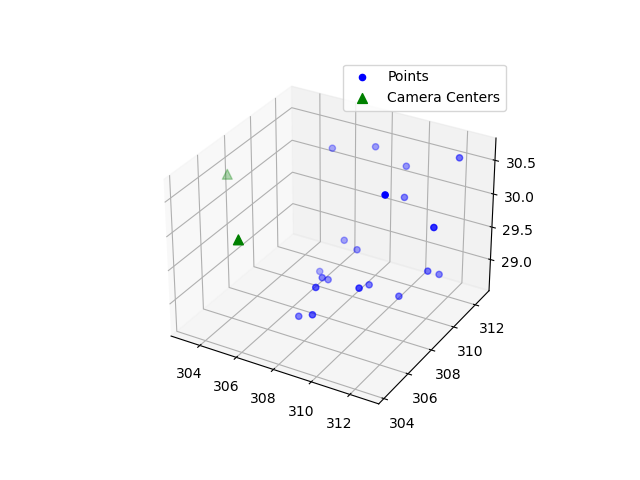

4. **Extra Credits [3 pts].** Use the putative match generation and RANSAC
code from `PS3` to estimate fundamental matrices without
ground-truth matches. For this part, only use the normalized algorithm.
Report the number of inliers and the average residual for the inliers.
Compare the quality of the result with the one you get from ground-truth
matches.



In [108]:
# some helper functions
import cv2
def imread(fname):
    """
    Read image into np array from file.
    
    :param fname: filename.
    
    return: image array.
    """
    return cv2.imread(fname)

def imread_bw(fname):
    """
    Read image as gray scale format.
    
    :param fname: filename.
    
    return: image array.
    """
    return cv2.cvtColor(imread(fname), cv2.COLOR_BGR2GRAY)

def imshow(img):
    """
    Show image.
    
    :param img: image array.
    """
    skimage.io.imshow(img)
    
def get_sift_data(img):
    """
    Detect the keypoints and compute their SIFT descriptors with opencv library
    
    :param img: image array.
    
    return: (keypoints array, descriptors). keypoints array (Nx2) contains the coordinate (x,y) of each keypoint. 
    Descriptors have size Nx128.
    """
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    kp = np.array([k.pt for k in kp])
    return kp, des

def plot_inlier_matches(ax, img1, img2, inliers):
    """
    Plot the match between two image according to the matched keypoints
    
    :param ax: plot handle
    :param img1: left image
    :param img2: right image
    :param inliers: x,y in the second image and x,y in the first image (Nx4)
    """
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')
    
    ax.plot(inliers[:,2], inliers[:,3], '+r')
    ax.plot(inliers[:,0] + img1.shape[1], inliers[:,1], '+r')
    ax.plot([inliers[:,2], inliers[:,0] + img1.shape[1]],
            [inliers[:,3], inliers[:,1]], 'r', linewidth=0.4)
    ax.axis('off')

In [110]:
import scipy
from PIL import Image
import numpy as np
import cv2, os
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
import skimage
def get_best_matches(img1, img2, num_matches):
    """
    Returns the matched keypoints between img1 and img2.
    :param img1: left image.
    :param img2: right image.
    :param num_matches: the number of matches that we want.
    
    return: pixel coordinates of the matched keypoints (x,y in the second image and x,y in the first image), which is a Nx4 numpy array. 
    """
    kp1, des1 = get_sift_data(img1)
    kp2, des2 = get_sift_data(img2)

    # Find distance between descriptors in images
    dist = scipy.spatial.distance.cdist(des1, des2, 'sqeuclidean')
    
    # Write your code to get the matches according to dist
    # ADD YOUR CODE HERE
    idx = np.argsort(dist, axis=None)[:num_matches]# First num_matches descriptors with smallest distance between them are chosen
    idx1 = idx // dist.shape[1]#First image index
    idx2 = idx % dist.shape[1]#Second image index
    out_kp = np.zeros((num_matches, 4))
    out_kp[:, 2] = kp1[idx1, 0]#First image point
    out_kp[:, 3] = kp1[idx1, 1]
    out_kp[:, 0] = kp2[idx2, 0]#Second image point
    out_kp[:, 1] = kp2[idx2, 1]

    return out_kp


img1 = imread('./calibration/lab1.jpg')
img2 = imread('./calibration/lab2.jpg')

data = get_best_matches(img1, img2, 20)
fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, img1, img2, data)
#fig.savefig('sift_match.pdf', bbox_inches='tight')

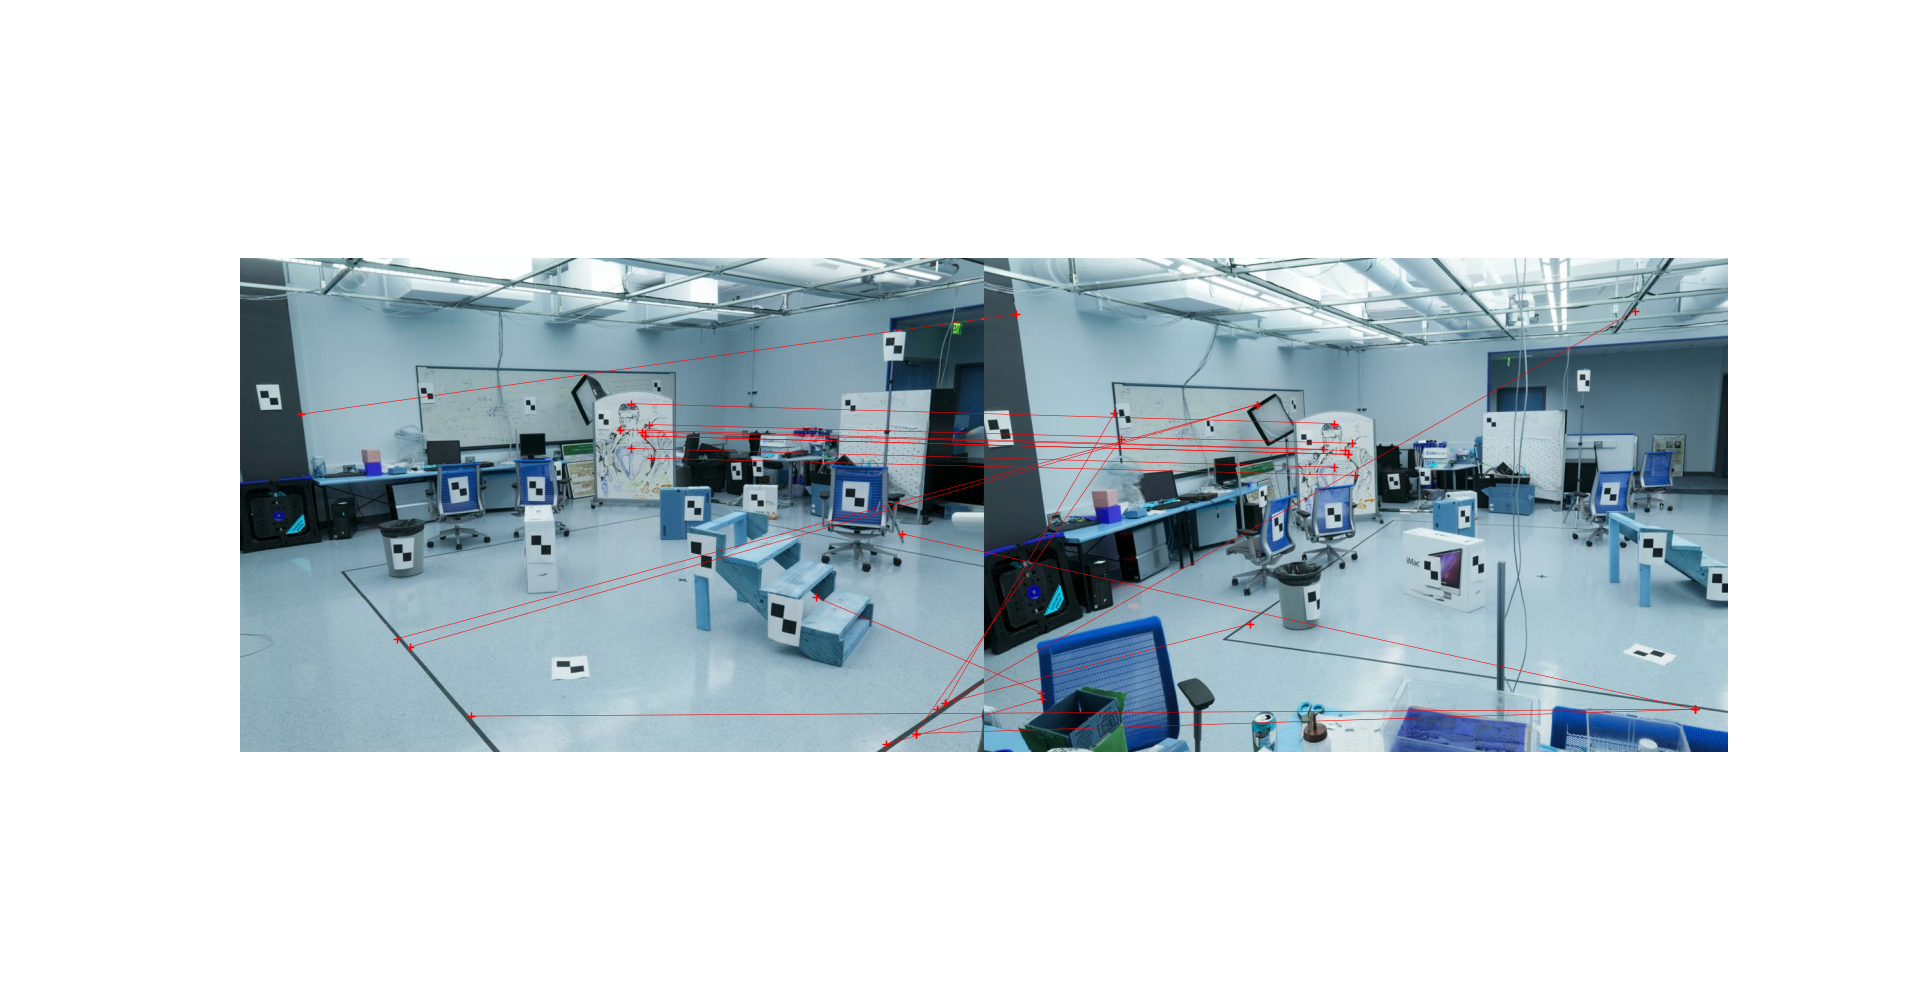

In [112]:
def ransac(data, max_iters=10000, min_inliers=2):
    """
    Write your ransac code to find the best model, inliers, and residuals
    
    :param data: pixel coordinates of matched keypoints.
    :param max_iters: number of maximum iterations
    :param min_inliers: number of minimum inliers in RANSAC
    
    return: (homography matrix, number of inliers) -> (3x3 numpy array, int)
    """
    
    # ADD YOUR CODE HERE
    dist_out=0
    best_perf = []
    H_out = None
    for i in range(max_iters):
        # randomly choose 4 points from the matrix to compute the homography
        pairs = [data[i] for i in np.random.choice(len(data), 4)]# Four points chosen in random

        H = compute_homography(pairs)# Homography matrix computed
        inliers=[]
        dist=0
        for pair in data:
            p1 = np.array([pair[0], pair[1], 1])#Point in image 1
            p2 = np.array([pair[2], pair[3], 1])#Point in image 2

            p2_estimate = np.dot(H, np.transpose(p1))
            p2_estimate = (1 / p2_estimate[2]) * p2_estimate
    

            distance=np.linalg.norm(np.transpose(p2) - p2_estimate)#Distance between points in one image to transformed coordinates in another image
            if distance< 5:
                inliers.append(list(pair))#Inliers are stored
                dist+=distance#Total distance calculated
                
            
        if len(inliers) > len(best_perf) and len(inliers)>min_inliers :#If current inliers are more than best and minimum inliers required
            best_perf = inliers
            dist_out=dist#Total distance
            H_out = H# Best homography matrix
    
    #return , len(best_inliers)
    #H_out,best_perf=

    return H_out, len(best_perf), best_perf, dist_out

def compute_homography(matches):
    """
    Write your code to compute homography according to the matches
    
    :param matches: coordinates of matched  keypoints.
    
    return: homography matrix, which is a 3x3 numpy array
    """
    
    # ADD YOUR CODE HERE
    A = []
    for x1, y1, x2, y2 in matches:#Homography matrix computation
        A.append([x1, y1, 1, 0, 0, 0, -x2 * x1, -x2 * y1, -x2])
        A.append([0, 0, 0, x1, y1, 1, -y2 * x1, -y2 * y1, -y2])
    A = np.array(A)
    #print(A.shape)
    U, S, V = np.linalg.svd(A)#SVD solver
    H = V[-1,:].reshape((3,3))
    #H = (1 / H.item(8)) * H
    return H

np.random.seed(1237)
# Report the number of inliers in your matching
H, max_inliers, inliers, residual = ransac(data)
inliers=np.array(inliers)
print("Inliers:", max_inliers)
print("Average Residual:", residual/max_inliers)
fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, img1, img2, inliers.reshape(max_inliers,4))

/var/folders/2j/pd7nhp7108s_455z3j55fg4m0000gn/T/ipykernel_52508/3998704583.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  p2_estimate = (1 / p2_estimate[2]) * p2_estimate
/var/folders/2j/pd7nhp7108s_455z3j55fg4m0000gn/T/ipykernel_52508/3998704583.py:28: RuntimeWarning: invalid value encountered in multiply
  p2_estimate = (1 / p2_estimate[2]) * p2_estimate


Inliers: 8
Average Residual: 0.5818883136546321


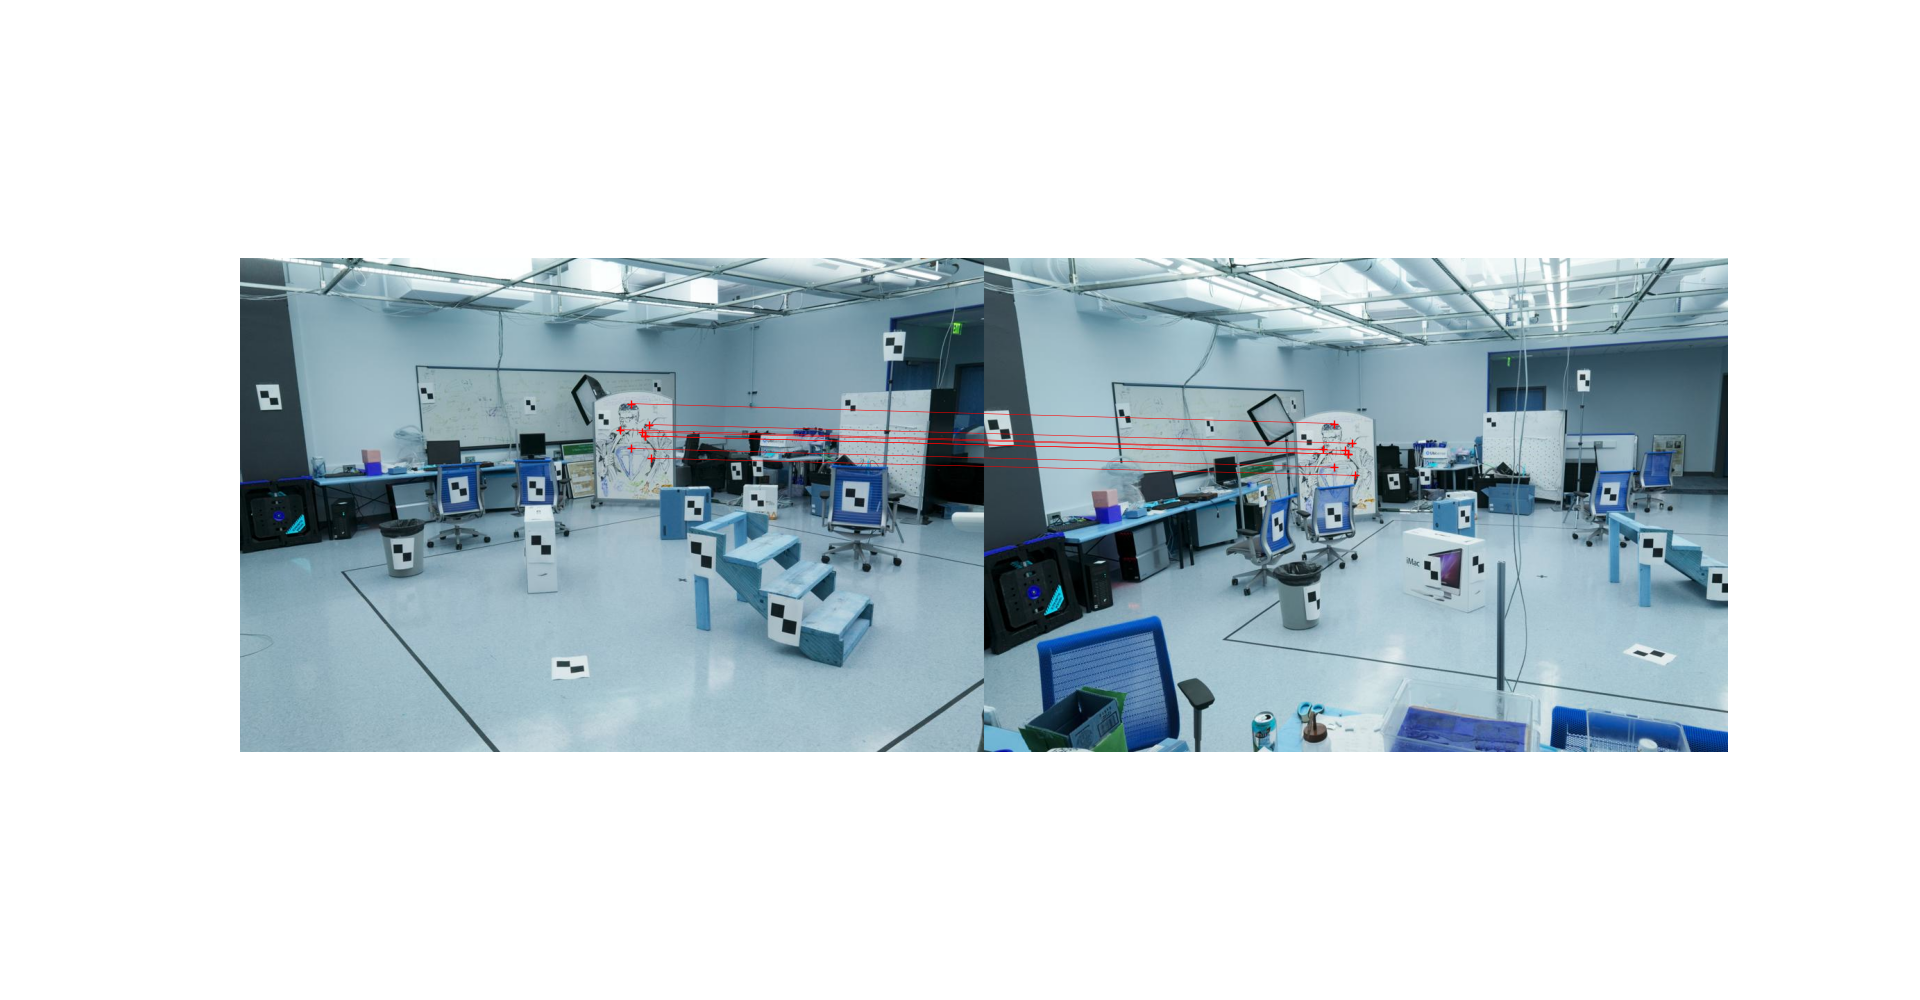

In [113]:
def normalize(points):
    centroid = np.mean(points, axis=0)
    dist = np.sqrt(np.sum((points - centroid)**2, axis=1))
    scale = np.sqrt(2) / np.mean(dist)
    T = np.array([[scale, 0, -scale*centroid[0]],
                  [0, scale, -scale*centroid[1]],
                  [0, 0, 1]])
    return np.dot(T, np.concatenate((points.T, np.ones((1, points.shape[0])))))

def eight_point_algo_normalized(points1, points2, t=0.01):
    # Normalize the points
    norm_points1 = normalize(points1)
    norm_points2 = normalize(points2)

    # Construct the A matrix
    A = np.concatenate((norm_points1.T * norm_points2[:, 0],
                        norm_points1.T * norm_points2[:, 1],
                        norm_points1.T), axis=1)

    # Solve F using the SVD of A
    _, _, V = np.linalg.svd(A)
    F = V[-1].reshape(3, 3)

    # Enforce rank-2 constraint on F
    U, S, V = np.linalg.svd(F)
    S[2] = 0
    F = np.dot(U, np.dot(np.diag(S), V))

    # Denormalize F
    T1 = np.array([[1/t, 0, 0],
                   [0, 1/t, 0],
                   [0, 0, 1]])
    T2 = np.array([[1/t, 0, 0],
                   [0, 1/t, 0],
                   [0, 0, 1]])
    F = np.dot(T2.T, np.dot(F, T1))

    return F / F[2, 2]

def find_inliers(F, points1, points2, t=10):
    # Compute the sampson distance for each point
    epi_lines1 = np.dot(F, np.concatenate((points1.T, np.ones((1, points1.shape[0])))))
    epi_lines2 = np.dot(F.T, np.concatenate((points2.T, np.ones((1, points2.shape[0])))))
    d1 = np.sum(np.matmul(points2,epi_lines1[:2, :]) ** 2, axis=0) + epi_lines1[2, :] ** 2
    d2 = np.sum(np.matmul(points1,epi_lines2[:2, :]) ** 2, axis=0) + epi_lines2[2, :] ** 2
    num = d1 + d2
    den = np.sum((np.dot((np.concatenate((points2.T, np.ones((1, points2.shape[0]))))).T, F.T) ** 2), axis=1) + np.sum((np.dot((np.concatenate((points1.T, np.ones((1, points1.shape[0]))))).T, F) ** 2), axis=1)
    distance = num / den

    # Compute the inliers
    inliers2 = distance < t
    return inliers2, np.mean(distance[inliers2])


In [116]:
inlier_point1=inliers[:,:2]
inlier_point2=inliers[:,2:]
#print(inlier_point1)
#print(inlier_point2)

F = eight_point_algo_normalized(inlier_point1, inlier_point2)
print('Fundamental Matrix:', F)

inliersnew, avgresidual = find_inliers(F, inlier_point1, inlier_point2)

print('Inliers:',np.sum(inliersnew))
print('Residual Error:', residual/np.sum(inliersnew))

Fundamental Matrix: [[-4.00607258e-13 -5.06459794e-13 -1.96261557e-14]
 [ 4.29862580e-12  2.87999166e-12 -1.00000000e+02]
 [-3.25523101e-14 -1.56090044e-14  1.00000000e+00]]
Inliers: 8
Residual Error: 0.5818883136546321


The output from ground truth matches is better since it's residual is only 0.01338 since they are all properly matched while putative matching is not able to find the matches properly in this case.

7. **Vanishing points [12 pts total]** Using `ps5_example.jpg`, you need to estimate the three major orthogonal vanishing points. Use at least three manually selected lines to solve for each vanishing point. The starter code below provides an interface for selecting and drawing the lines, but the code for computing the vanishing point needs to be inserted. For details on estimating vanishing points, see Lab 10. 

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

def get_input_lines(im, min_lines=3):
    """
    Allows user to input line segments; computes centers and directions.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        min_lines: minimum number of lines required
    Returns:
        n: number of lines from input
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        centers: np.ndarray of shape (3, n)
            where each column denotes the homogeneous coordinates of the centers
    """
    n = 0
    lines = np.zeros((3, 0))
    centers = np.zeros((3, 0))

    plt.figure()
    plt.axis('off')
    plt.imshow(im)
    print(f'Set at least {min_lines} lines to compute vanishing point')
    print(f'The delete and backspace keys act like right clicking')
    print(f'The enter key acts like middle clicking')
    while True:
        print('Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input')
        clicked = plt.ginput(2, timeout=0, show_clicks=True)
        if not clicked or len(clicked) < 2:
            if n < min_lines:
                print(f'Need at least {min_lines} lines, you have {n} now')
                continue
            else:
                # Stop getting lines if number of lines is enough
                break

        # Unpack user inputs and save as homogeneous coordinates
        pt1 = np.array([clicked[0][0], clicked[0][1], 1])
        pt2 = np.array([clicked[1][0], clicked[1][1], 1])
        # Get line equation using cross product
        # Line equation: line[0] * x + line[1] * y + line[2] = 0
        line = np.cross(pt1, pt2)
        lines = np.append(lines, line.reshape((3, 1)), axis=1)
        # Get center coordinate of the line segment
        center = (pt1 + pt2) / 2
        centers = np.append(centers, center.reshape((3, 1)), axis=1)

        # Plot line segment
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='b')

        n += 1

    return n, lines, centers

def plot_lines_and_vp(ax, im, lines, vp):
    """
    Plots user-input lines and the calculated vanishing point.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        vp: np.ndarray of shape (3, )
    """
    bx1 = min(1, vp[0] / vp[2]) - 10
    bx2 = max(im.shape[1], vp[0] / vp[2]) + 10
    by1 = min(1, vp[1] / vp[2]) - 10
    by2 = max(im.shape[0], vp[1] / vp[2]) + 10
    
    ax.imshow(im)
    for i in range(lines.shape[1]):
        if lines[0, i] < lines[1, i]:
            pt1 = np.cross(np.array([1, 0, -bx1]), lines[:, i])
            pt2 = np.cross(np.array([1, 0, -bx2]), lines[:, i])
        else:
            pt1 = np.cross(np.array([0, 1, -by1]), lines[:, i])
            pt2 = np.cross(np.array([0, 1, -by2]), lines[:, i])
        pt1 = pt1 / pt1[2]
        pt2 = pt2 / pt2[2]
        ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'g')

    ax.plot(vp[0] / vp[2], vp[1] / vp[2], 'ro')
    ax.set_xlim([bx1, bx2])
    ax.set_ylim([by2, by1])

def get_top_and_bottom_coordinates(im, obj):
    """
    For a specific object, prompts user to record the top coordinate and the bottom coordinate in the image.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        obj: string, object name
    Returns:
        coord: np.ndarray of shape (3, 2)
            where coord[:, 0] is the homogeneous coordinate of the top of the object and coord[:, 1] is the homogeneous
            coordinate of the bottom
    """
    plt.figure()
    plt.imshow(im)

    print('Click on the top coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x1, y1 = clicked[0]
    # Uncomment this line to enable a vertical line to help align the two coordinates
    # plt.plot([x1, x1], [0, im.shape[0]], 'b')
    print('Click on the bottom coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x2, y2 = clicked[0]

    plt.plot([x1, x2], [y1, y2], 'b')

    return np.array([[x1, x2], [y1, y2], [1, 1]])

7.1. **Estimating Horizon [3 pts]** You should: a) plot the VPs and the lines used to estimate the vanishing points (VP) on the image plane using the provided code. b) Specify the VP pixel coordinates. c) Plot the ground horizon line and specify its parameters in the form $a * x + b * y + c = 0$. Normalize the parameters so that: $a^2 + b^2 = 1$.

In [2]:
def get_vanishing_point(lines):
    """
    Solves for the vanishing point using the user-input lines.
    """
    # <YOUR CODE>
    w, v = np.linalg.eig(lines.dot(lines.T))
    i = np.argmin(w)
    vp = v[:, i]# Eigen vector corresponding to minimum eigen value
    vp = vp / vp[-1]# Homogenous
    vp_final=np.array(vp)
    return vp_final
    #pass
    

    return vp

def get_horizon_line(vpts):
    """
    Calculates the ground horizon line.
    """
    # <YOUR IMPLEMENTATION>
    
    horizon_line = np.cross(vpts[:, 0], vpts[:, 1])# Horizon Line
    scaled_horizon_line=horizon_line / np.sqrt(horizon_line[0]**2 + horizon_line[1]**2)
    
    return scaled_horizon_line
    #pass

def plot_horizon_line(im, horizon_line):
    """
    Plots the horizon line.
    """
    # <YOUR IMPLEMENTATION>
    x = np.arange(im.shape[1])
    y = (- horizon_line[2] - horizon_line[0] * x) / horizon_line[1]
    
    plt.figure()
    plt.imshow(im)
    plt.plot(x, y, 'r', linestyle='-', linewidth=3)    
    plt.show()

im = np.asarray(Image.open('ps5_example.jpg'))

# Get vanishing points for each of the directions
num_vpts = 3
vpts = np.zeros((3, num_vpts))
#vpts=[]
for i in range(num_vpts):
    print('Getting vanishing point %d' % i)
    fig = plt.figure()
    ax=fig.gca()
    # Get at least three lines from user input
    n, lines, centers = get_input_lines(im)
    # <YOUR IMPLEMENTATION> Solve for vanishing point
    vpts[:,i]=get_vanishing_point(lines)
    # Plot the lines and the vanishing point
    plot_lines_and_vp(ax, im, lines, vpts[:,i])

# <YOUR IMPLEMENTATION> Get the ground horizon line
horizon_line = get_horizon_line(vpts)
# <YOUR IMPLEMENTATION> Plot the ground horizon line
plot_horizon_line(im,horizon_line)
print(vpts)

Getting vanishing point 0
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Getting vanishing point 1
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (de

7.1 A ps5_example.jpg with plotted vanishing points and lines to estimate the VPs.

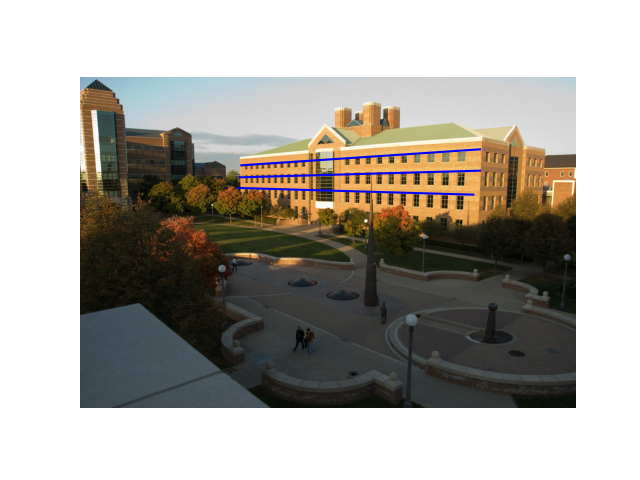

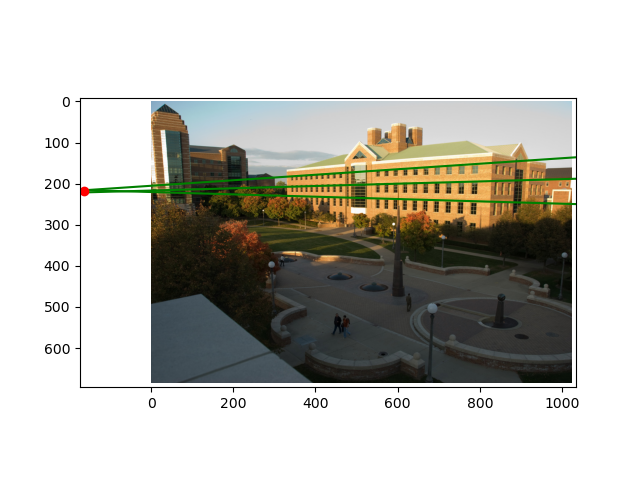

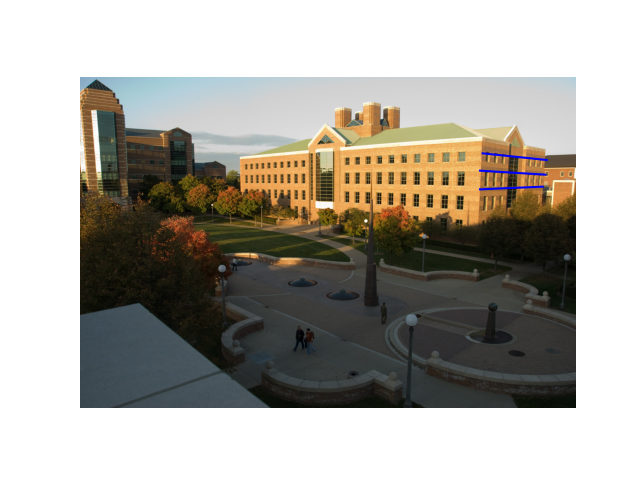

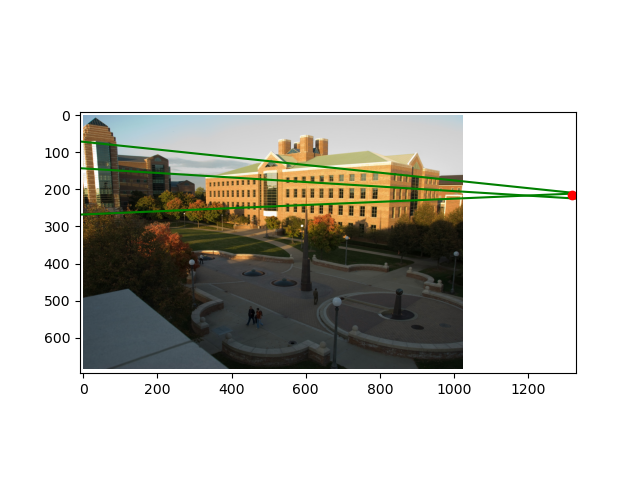

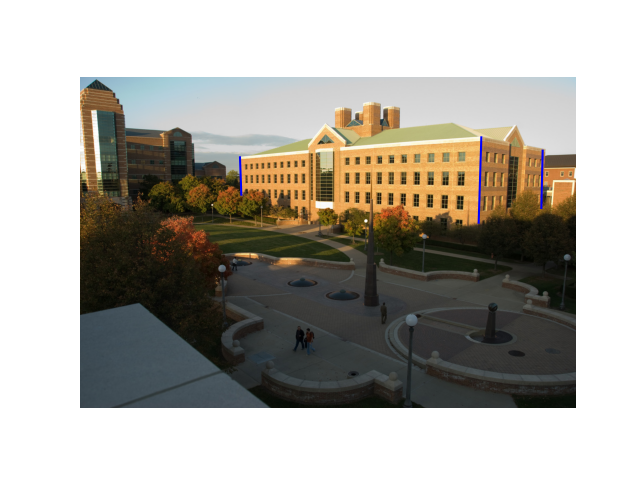

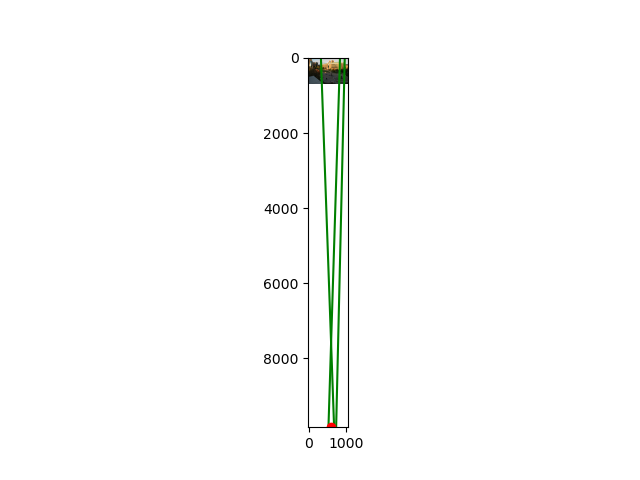

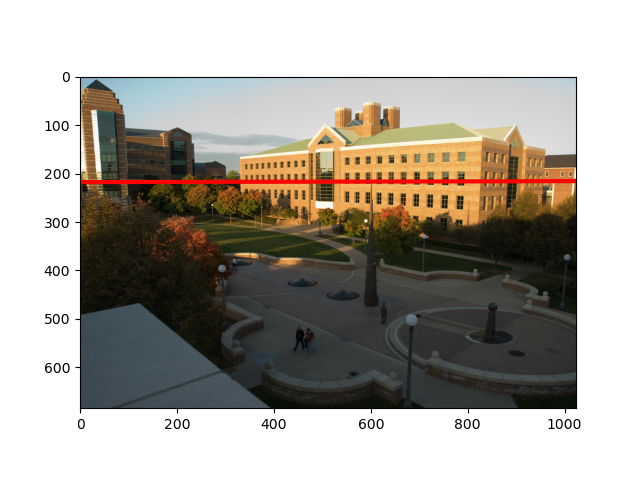

The blue lines represent the user entered lines for calculating vanishing points. The green lines represent the intersecting lines computing vanishing points. The red line is the horizon line.

7.2. **Solving for camera parameters [3 pts]** Using the fact that the vanishing directions are orthogonal, solve for the focal length and optical center (principal point) of the camera. Show all your work and include the computed parameters in your report.

In [3]:
import sympy as sp
def get_camera_parameters(vpts):
    """
    Computes the camera parameters. Hint: The SymPy package is suitable for this.
    """
    pt1 = sp.Matrix(vpts[:, 0])
    pt2 = sp.Matrix(vpts[:, 1]) 
    pt3 = sp.Matrix(vpts[:, 2])
    k = sp.Matrix((('f', 0, 'u'), (0, 'f', 'v'), (0, 0, 1)))
    
    #Constraints
    constraints=[pt1.T*k.inv().T*k.inv()*pt2, 
                 pt1.T*k.inv().T*k.inv()*pt3, 
                 pt2.T*k.inv().T*k.inv()*pt3]
    #Sympy is used to solve the constraints
    try:
        solutions = sp.solve(constraints, ['f', 'u', 'v'])
        if len(solutions) > 0:
            f, u, v = solutions[0]
            return f, u, v
        else:
            raise ValueError("No solutions found for given constraints.")
    except sp.SolveFailed:
        raise ValueError("Unable to solve for f, u, and v.")
    
    return f, u, v

    #pass

# <YOUR IMPLEMENTATION> Solve for the camera parameters (f, u, v)

f, u, v= get_camera_parameters(vpts)
K_val = np.array([[-f, 0, u], [0, -f, v], [0, 0, 1]],dtype=float)
print(K_val)

[[738.99604159   0.         580.92774358]
 [  0.         738.99604159 273.5966585 ]
 [  0.           0.           1.        ]]


7.2 The focal length and optical center (principal point) of the camera. 

Focal Length=738.99
Optical Center= (580.927,273.596)


7.3. **Camera rotation matrix [3 pts]** Compute the rotation matrix for the camera, setting the vertical vanishing point as the Y-direction, the right-most vanishing point as the X-direction, and the left-most vanishing point as the Z-direction.

In [4]:
def get_rotation_matrix(vpts):
    """
    Computes the rotation matrix using the camera parameters.
    """
    # <YOUR CODE>
    # Rotation is calculated as Kinverse.vanishing point
    K_inv = np.linalg.inv(K_val)
    R = []
    for curr_vp in [vpts[:,0], vpts[:,1], vpts[:,2]]:
        curr_col = K_inv @ curr_vp
        curr_mag = sum(elem ** 2 for elem in curr_col) ** 0.5 
        curr_col /= curr_mag
        R.append(curr_col)
    R = np.stack(R)
    return np.transpose(R)

    #pass

# <YOUR IMPLEMENTATION> Solve for the rotation matrix
R = get_rotation_matrix(vpts)
print(R)

[[-0.70850355  0.7057048   0.00185845]
 [-0.05312685 -0.05596316  0.99701839]
 [ 0.70370466  0.70629234  0.07714197]]


7.3. The rotation matrix is printed above.

7.4. **Measurement estimation [3 pts]** Estimate the heights of (a) the large building in the center of the image, (b) the spike statue, and (c) the lamp posts assuming that the person nearest to the spike is 5ft 6in tall. In the report, show all the lines and measurements used to perform the calculation. How do the answers change if you assume the person is 6ft tall?

In [5]:
def estimate_height(im,obj_to_est, reference_object, reference_height, vpts):
    """
    Estimates height for a specific object using the recorded coordinates. You might need to plot additional images here for
    your report.
    """
    # <YOUR IMPLEMENTATION>
      
    # Reference coordinates
    t0 = reference_object[:, 0]
    b0 = reference_object[:, 1]

    # Obj coords.
    r = obj_to_est[:, 0] #Object end point
    b = obj_to_est[:, 1] #Object Base Point
    
    v = np.cross(np.cross(b, b0), horizon_line)
    v = v / v[-1]
    t = np.cross(np.cross(v, t0), np.cross(r, b))
    t = t / t[-1]#projected coordinate of the reference object on the object to estimate
    
    vz = vpts[:, 2]# Vanishing point at infinity
    #image-cross ratio*reference height
    h2=np.linalg.norm(r-b)*np.linalg.norm(vz-t)
    h1=np.linalg.norm(t-b)*np.linalg.norm(vz-r)
    height = (h2/h1)*reference_height
    
    # Plot the lines used for measuring height.
    plt.figure()
    plt.imshow(im)
    plt.plot([t0[0], b0[0]], [t0[1], b0[1]], 'b')
    plt.plot([b[0], b0[0]], [b[1], b0[1]], 'g')
    plt.plot([t0[0], t[0]], [t0[1], t[1]], 'g')
    plt.plot(t[0], t[1], 'g', marker='+')
    plt.plot(b[0], b[1], 'g', marker='+')
    plt.plot([r[0], b[0]], [r[1], b[1]], 'r', linestyle='-', linewidth=1.5)
     
    x = np.arange(im.shape[1])
    y = (- horizon_line[2] - horizon_line[0] * x) / horizon_line[1]
    plt.plot(x, y, 'r', linestyle='-', linewidth=1)   
    
    plt.plot([b[0], v[0]], [b[1], v[1]], 'g', linestyle='-', linewidth=1)
    plt.plot([t[0], v[0]], [t[1], v[1]], 'g', linestyle='-', linewidth=1)
    plt.plot(v[0], v[1], 'g', marker='o', markersize=2.5)
    
    plt.show()
    
    return height
    #pass

objects = ('person', 'Building', 'the spike statue', 'the lamp posts')
coords = dict()
for obj in objects:
    coords[obj] = get_top_and_bottom_coordinates(im, obj)

# <YOUR IMPLEMENTATION> Estimate heights
for height in [66, 72]:
  for obj in objects[1:]:
    ft = height // 12
    inches = height % 12
    print('Estimating height of %s at height %i ft %i inches' % (obj, ft, inches))
    pred_height = estimate_height(im,coords[obj], coords['person'], height, vpts)
    ft = pred_height // 12
    inches = pred_height % 12
    print('predicted height: %i ft %i inches' % (ft, inches))

Click on the top coordinate of person
Click on the bottom coordinate of person
Click on the top coordinate of Building
Click on the bottom coordinate of Building
Click on the top coordinate of the spike statue
Click on the bottom coordinate of the spike statue
Click on the top coordinate of the lamp posts
Click on the bottom coordinate of the lamp posts
Estimating height of Building at height 5 ft 6 inches
predicted height: 79 ft 5 inches
Estimating height of the spike statue at height 5 ft 6 inches
predicted height: 32 ft 7 inches
Estimating height of the lamp posts at height 5 ft 6 inches
predicted height: 16 ft 3 inches
Estimating height of Building at height 6 ft 0 inches
predicted height: 86 ft 7 inches
Estimating height of the spike statue at height 6 ft 0 inches
predicted height: 35 ft 7 inches
Estimating height of the lamp posts at height 6 ft 0 inches
predicted height: 17 ft 9 inches


The estimated heights are given above. The plots showing all the lines used to calculate the heights are shown below.

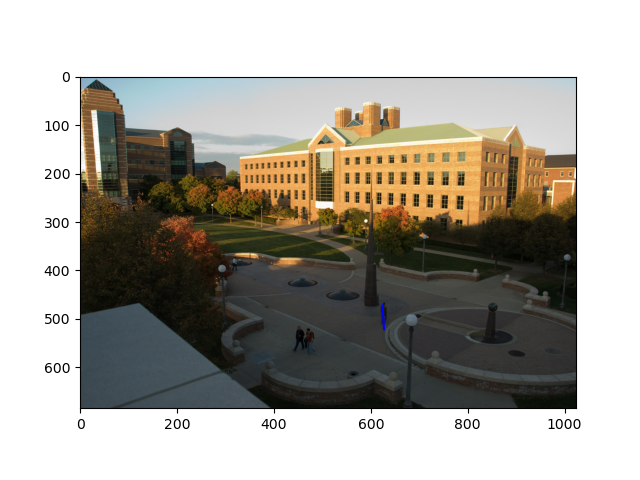

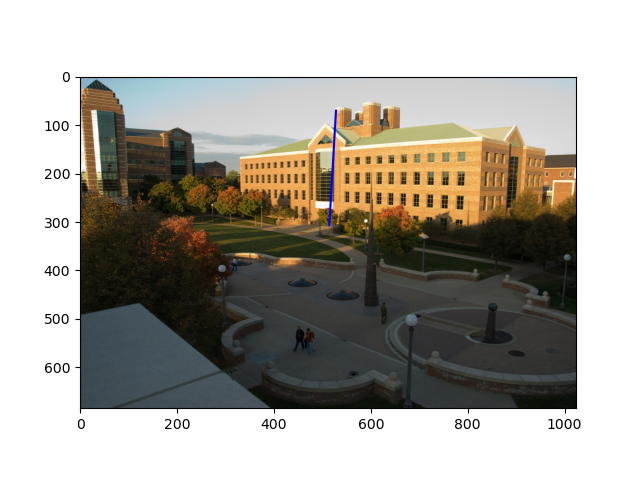

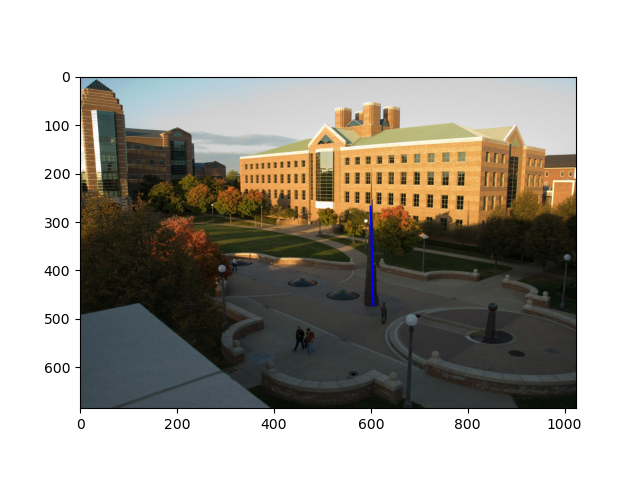

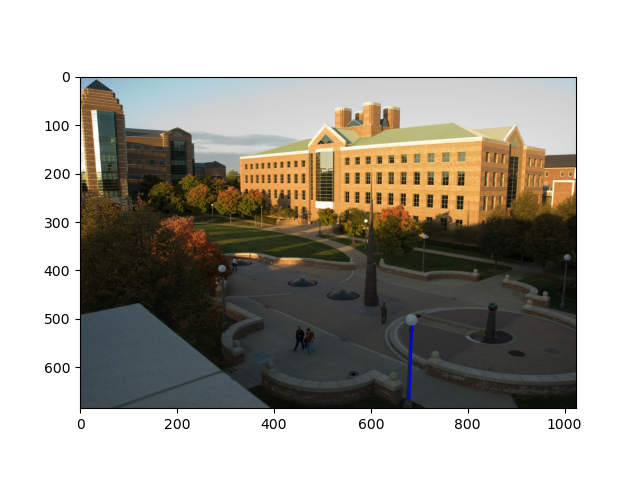

The above images are input heights.

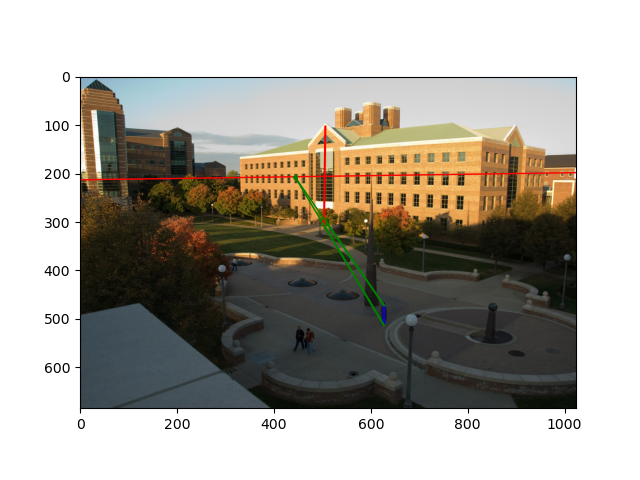

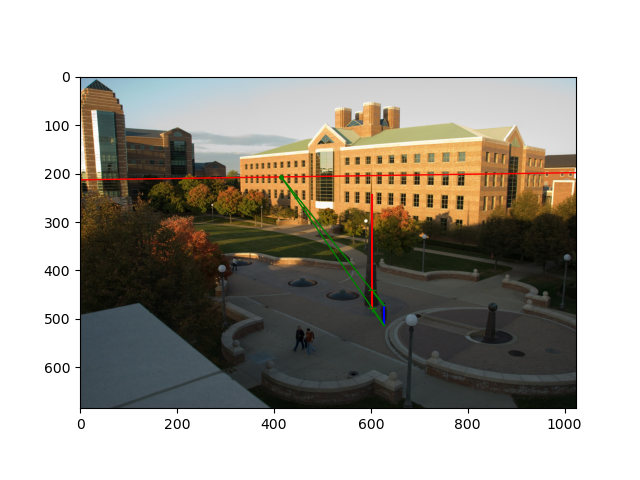

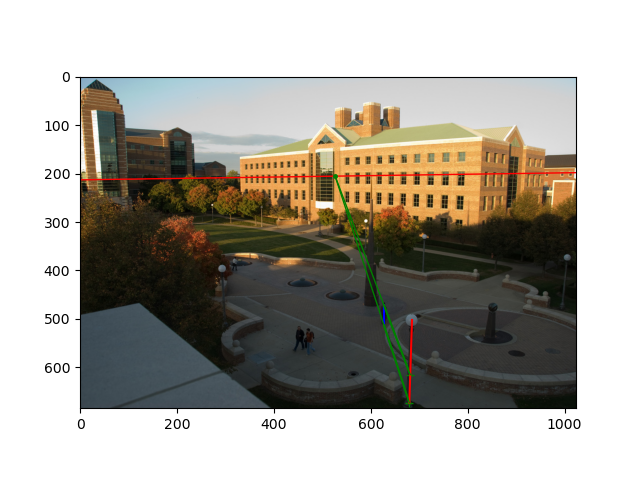

The above image plots the lines from the reference image joining to the horizon line to calculate the length of the objects.

Method of calculating the heights:
1. The t and b points are calculated that corresponds to the starting and the end of the projection of the referenvce object i.e. person on the object to be estimated and t0 and b0 the starting and ending points of the object to be estimated.
2. Hence the colinear points are t,b,r i.e. the reference point and that vanishing point at infinity.
3. Hence, the cross-image ratio is calculated.
4. Further, it is multiplied with the reference height to get the object height.

8. **Warped view [5 bonus pts]** Compute and display rectified views of the ground plane and the large building in the center of the image.